In [1]:
import geohash
import pandas as pd
import numpy as np
import random
import math
import operator
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time
%matplotlib inline

from init import init
from eva import eva
from nond import nond
from ope import ope
from tour import tour
from rep import rep
from score import score
#读取距离矩阵
dis = pd.read_csv('C:/Users/sjw/Desktop/paper/data/dis.csv',header=None,low_memory=False).values.tolist()

#生成初始停车顺序，V用户，gen代数，pop种群大小，M目标函数数量，
V = len(dis)
M = 2
gen = 100
pop = 30
#初始化与排序
chro,train = init(pop,V,dis)
chro = nond(chro,M,V)
#选择参数
#tour_size = 2
#pour_size = round(pop/2)
chro_lr = []

Tlr = []
Tg = []

In [2]:
for g in range(gen):
    #选择交叉
    #chro = tour(chro,pour_size,tour_size)
    timeS=time.time()
    ope(chro,M,V,dis,train)
    #回归变异
    
    time_start=time.time()
    
    y = []
    lr_x = []
    for i in range(len(train)):
        y.append(train[i][745])
        lr_x.append(train[i][0:745])
    y = np.reshape(y,newshape=(i+1,1))

    lr = LinearRegression()
    lr.fit(lr_x,y)
    lastlist = np.argsort(lr.coef_[0],axis=0)
    
    time_end=time.time()
    Tlr.append(time_end-time_start)
    #回归系数
    gentic = lastlist.tolist()
    sup = eva(gentic,V,dis)
    #变异个体集合
    chro_lr.append(gentic)
    
    chro = nond(chro,M,V)
    #继承淘汰
    chro = rep(chro,M,V,pop)
    timeE=time.time()
    Tg.append(timeE-timeS-(time_end-time_start))
    '''
    #画图
    if(g%20==0):
        X = np.array(chro)
        plt.clf()
        plt.scatter(X[:, 745], X[:, 746])
        plt.pause(0.1) # 关闭画图的窗口
        plt.ioff()
    '''

In [3]:
print(score(chro))

63213975.128760405


In [4]:
#加变异
for i in range(len(chro_lr)):
    chro.append(chro_lr[i])
#合并
chro = nond(chro,M,V)
chro = rep(chro,M,V,pop)

print(score(chro))

71624702.44365114


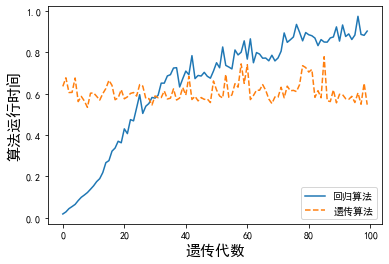

In [3]:
x = []

for i in range(gen):
    x.append(i)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置X轴标签  
plt.xlabel('遗传代数',fontsize=15)  
#设置Y轴标签  
plt.ylabel('算法运行时间',fontsize=15)

plt.plot(x,Tlr,linestyle="-", label="回归算法")
plt.plot(x,Tg,'--',linestyle="--", label="遗传算法")
plt.legend(loc='lower right')

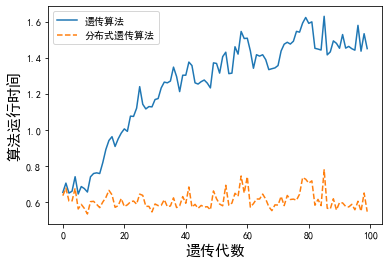

In [19]:
y = []
z = []
for i in range(gen):
    y.append(Tlr[i]+Tg[i])
    z.append(Tg[i])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置X轴标签  
plt.xlabel('遗传代数',fontsize=15)  
#设置Y轴标签  
plt.ylabel('算法运行时间',fontsize=15)

plt.plot(x,y,linestyle="-", label="遗传算法")
plt.plot(x,z,'--',linestyle="--", label="分布式遗传算法")
plt.legend(loc='upper left')

In [20]:
bb = []

for i in range(gen):
    bb.append((y[i]-z[i])/y[i]*100)
    


In [25]:
bb[99]

62.278501197601834

In [32]:
z[99]

0.5470740795135498